<a href="https://colab.research.google.com/github/Mystic6303/ML-DL-projects/blob/main/linear_regression_vehicle_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [51]:
df=pd.read_csv("car details v4.csv")
df.head(5)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [53]:
df1=df.drop(['Owner','Color','Seller Type'],axis=1)
print(df1.columns)

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Engine', 'Max Power', 'Max Torque',
       'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity',
       'Fuel Tank Capacity'],
      dtype='object')


In [54]:
df1.nunique()

Make                    33
Model                 1050
Price                  619
Year                    22
Kilometer              847
Fuel Type                9
Transmission             2
Location                77
Engine                 108
Max Power              335
Max Torque             290
Drivetrain               3
Length                 248
Width                  170
Height                 196
Seating Capacity         6
Fuel Tank Capacity      55
dtype: int64

In [55]:
df1.isna().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [56]:
col1=['Engine','Max Power','Max Torque','Drivetrain']
df1=df1.dropna(subset=col1)
df1.isnull().sum()

Make                   0
Model                  0
Price                  0
Year                   0
Kilometer              0
Fuel Type              0
Transmission           0
Location               0
Engine                 0
Max Power              0
Max Torque             0
Drivetrain             0
Length                 0
Width                  0
Height                 0
Seating Capacity       0
Fuel Tank Capacity    42
dtype: int64

In [57]:
df1=df1.fillna(df1['Fuel Tank Capacity'].mean())
df1.isnull().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64

In [58]:
df1.shape

(1916, 17)

In [59]:
object_columns = df1.select_dtypes(include=['object']).columns
print(object_columns)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in object_columns:
  df1[column] = le.fit_transform(df1[column])
print(df1.head(10))

Index(['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain'],
      dtype='object')
   Make  Model    Price  Year  Kilometer  Fuel Type  Transmission  Location  \
0     7     98   505000  2017      87150          5             1        56   
1    19    745   450000  2014      75000          2             1        40   
2     8    958   220000  2011      67000          5             1        39   
3    30    465   799000  2019      37500          5             1        41   
4    30    516  1950000  2018      69000          2             1        45   
5    19    202   675000  2017      73315          5             1        56   
6    21    157  1898999  2015      47000          5             0        45   
7     1    885  2650000  2017      75000          2             0        12   
8    27    581  1390000  2017      56000          5             0        45   
9    23    776   575000  2015      85000          2             

In [60]:
#to perform scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df2=scaler.fit_transform(df1)
df2=pd.DataFrame(df2, columns=df1.columns)

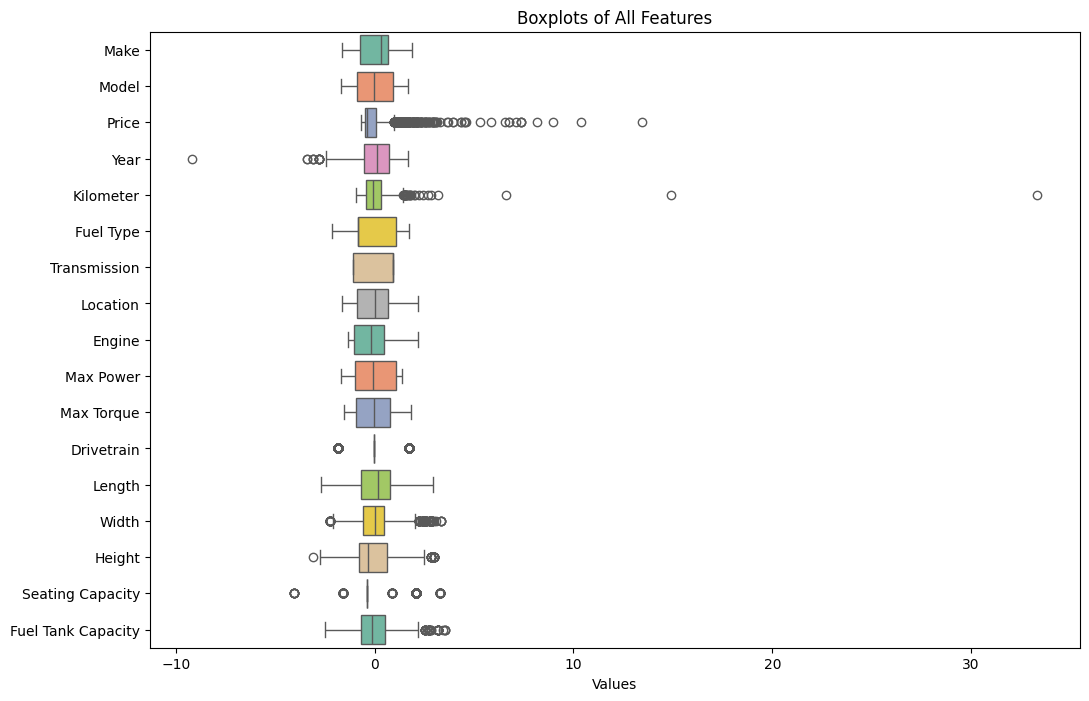

In [61]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df2, orient="h", palette="Set2")
plt.title('Boxplots of All Features')
plt.xlabel('Values')
plt.show()

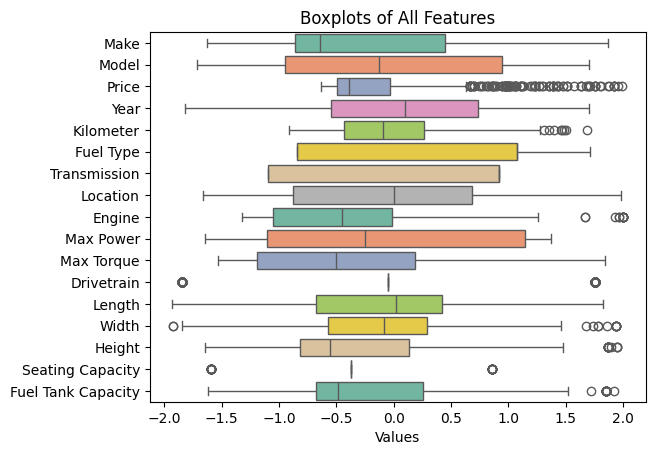

In [62]:
#to remove outliers
from scipy import stats
zscore=np.abs(stats.zscore(df2))
df2=df2[(zscore<2).all(axis=1)]
sns.boxplot(data=df2, orient="h", palette="Set2")
plt.title('Boxplots of All Features')
plt.xlabel('Values')
plt.show()

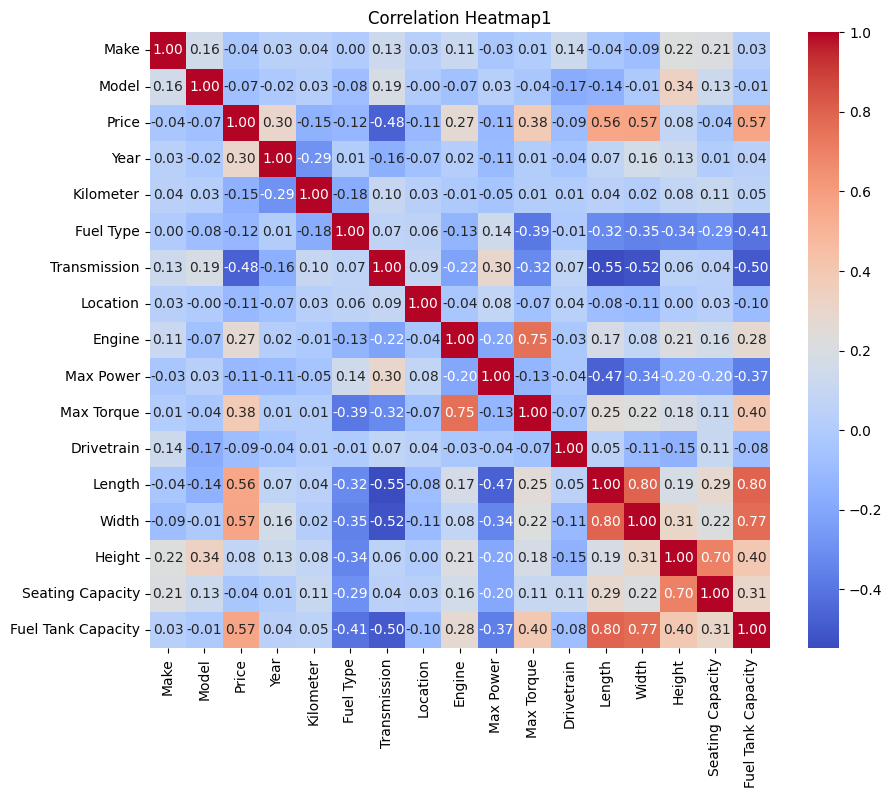

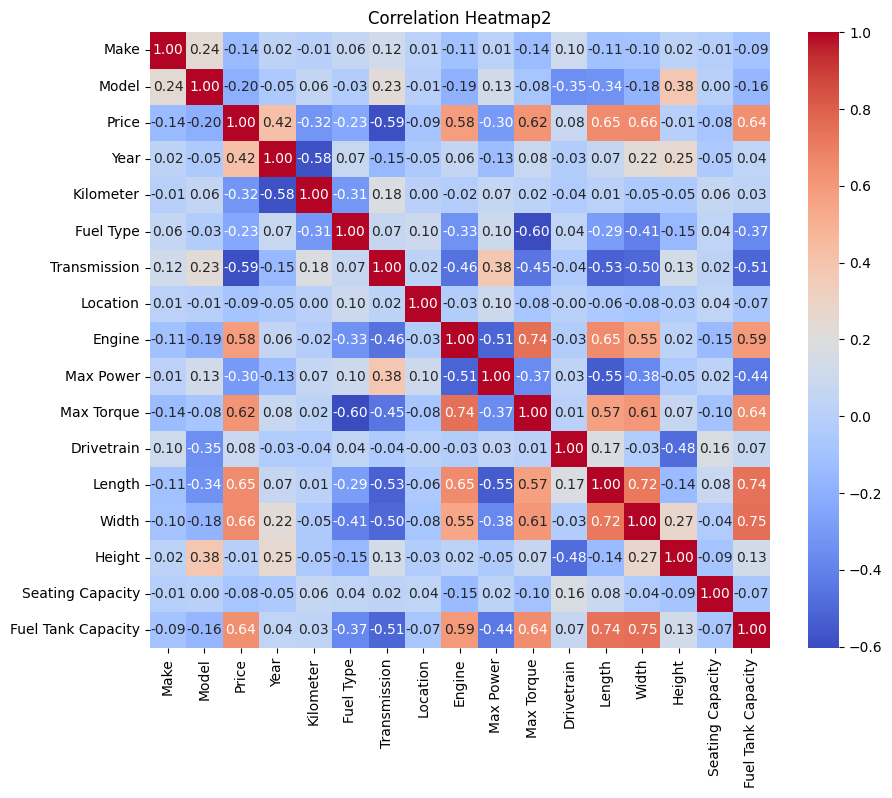

In [63]:

correlation_matrix=df1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap1')
plt.show()
correlation_matrix=df2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap2')
plt.show()

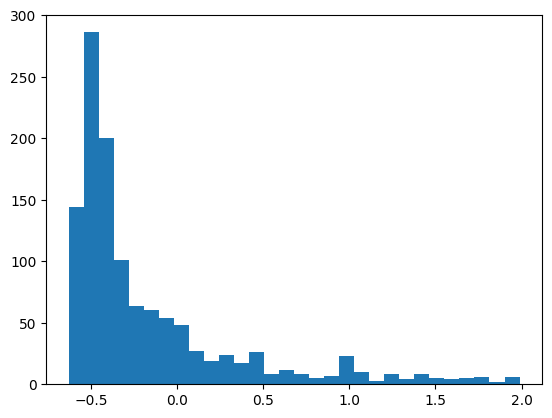

In [64]:
z=df2['Price']
plt.hist(z,30)
plt.show()

In [65]:
# Separate the target variable from the features
X = df2.drop(columns=['Price'])  # Features
y = df2['Price']  # Target variable

Epoch 1/20
27/27 [==============================] - 1s 12ms/step - loss: 1.4068 - val_loss: 1.4908
Epoch 2/20
27/27 [==============================] - 0s 6ms/step - loss: 1.2053 - val_loss: 1.2916
Epoch 3/20
27/27 [==============================] - 0s 5ms/step - loss: 1.0438 - val_loss: 1.1211
Epoch 4/20
27/27 [==============================] - 0s 5ms/step - loss: 0.9063 - val_loss: 0.9786
Epoch 5/20
27/27 [==============================] - 0s 5ms/step - loss: 0.7915 - val_loss: 0.8575
Epoch 6/20
27/27 [==============================] - 0s 5ms/step - loss: 0.6951 - val_loss: 0.7494
Epoch 7/20
27/27 [==============================] - 0s 6ms/step - loss: 0.6111 - val_loss: 0.6584
Epoch 8/20
27/27 [==============================] - 0s 5ms/step - loss: 0.5410 - val_loss: 0.5861
Epoch 9/20
27/27 [==============================] - 0s 5ms/step - loss: 0.4835 - val_loss: 0.5218
Epoch 10/20
27/27 [==============================] - 0s 6ms/step - loss: 0.4327 - val_loss: 0.4676
Epoch 11/20
27/27 

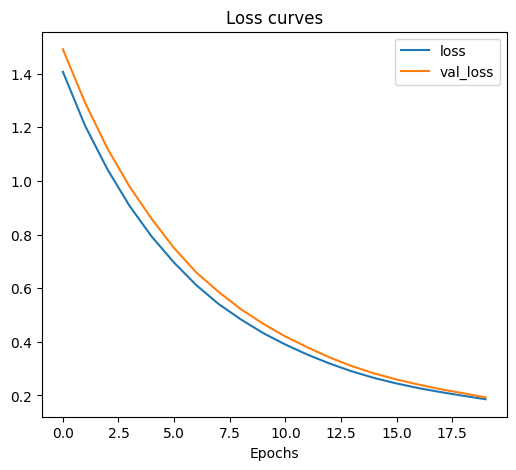

In [82]:
#making the linear regression model
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#30 percent taken for testing
#Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),# shape[1] refers to number of columns and model expects that to be the dimension
    tf.keras.layers.Dense(1)  # Linear regression with one output neuron
])

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
#Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test,y_test))
#Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
pd.DataFrame(history.history).plot(figsize=(6,5))
plt.xlabel("Epochs")
plt.title('Loss curves')
plt.legend();

In [83]:
"""# Scale the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Make predictions on the scaled testing data
predictions_scaled = model.predict(X_test_scaled)

# Inverse transform the predictions to get them back to the original scale
predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()

# Optionally, you can compare the original test target values with the predicted values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(comparison)"""
t = X_test.iloc[[4]]
s=y_test.iloc[[4]].values.reshape(-1,1)
predictions_scaled = model.predict(t)
scaler1=StandardScaler()
a=df1['Price'].values.reshape(-1,1)
a=scaler1.fit_transform(a)
#scale data values for easier comparison
# Inverse transform the predictions to get them back to the original scale
c = scaler1.inverse_transform(predictions_scaled).flatten()
s=scaler1.inverse_transform(s).flatten()
print("Expected: ",c,"Predicted: ",s)

1/1 [==============================] - 0s 46ms/step
Expected:  [3608258.2] Predicted:  [2900000.]
